Fit a logistic regression model to classify neural events using the fourier data from eeg signals

In [2]:
import numpy as np
import pandas as pd
import sklearn.datasets as skdata
import sklearn.metrics as skmetrics
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

In [3]:
# MAKE SURE TO CHANGE THIS TO THE LOCAL PATH TO DATA
#TRAIN_PATH = "../augmented_train/reformatted_train_106800_samples.csv"
TRAIN_PATH = "train_10000_samples_0_to_10_hz.csv"

data = pd.read_csv(TRAIN_PATH)

data_np = data.to_numpy()

print(data_np)
print(data_np.shape)

[[2165.875244140625 49192.8300358057 4950.520985686926 ...
  1.0998884090695715 -0.3377874641546745 'LRDA']
 [466.188720703125 34865.269945025444 5704.912146116356 ...
  -0.6758465848267224 -0.4742115666873585 'LPD']
 [196.77908325195312 18550.839977597818 3356.709263537125 ...
  0.7214381887485093 0.5082022822209593 'GPD']
 ...
 [14016254.0 1344455.0649087245 429328.468060573 ... -2.8103673961549203
  -2.122763833527274 'Seizure']
 [726.7728271484375 68503.0798098743 6331.501753051206 ...
  1.2531196335280073 -2.844648354805996 'Seizure']
 [484.8861083984375 48225.09995627403 8512.202587755772 ...
  -0.9684973867015032 -1.878838148097688 'Other']]
(9940, 2421)


In [4]:
num_input = data_np.shape[1] - 1

x = data_np[:, 0:num_input]
y = data_np[:, num_input]

# Shuffle the dataset based on sample indices
shuffled_indices = np.random.permutation(x.shape[0])

# Choose the first 80% as training set, next 10% as validation and the rest as testing
train_split_idx = int(0.80 * x.shape[0])
val_split_idx = int(0.90 * x.shape[0])

train_indices = shuffled_indices[0:train_split_idx]
val_indices = shuffled_indices[train_split_idx:val_split_idx]
test_indices = shuffled_indices[val_split_idx:]

# Select the examples from x and y to construct our training, validation, testing sets
x_train, y_train = x[train_indices, :], y[train_indices]
x_val, y_val = x[val_indices, :], y[val_indices]
x_test, y_test = x[test_indices, :], y[test_indices]

In [5]:
# Test out a number of models
models = []
val_scores = []

solver = 'newton-cg'
penalties = ['none', 'l2'] # l2 is ridge regression
num_iterations = [150, 250, 350, 450]

for penalty in penalties:

    for iter in num_iterations:

        model = LogisticRegression(solver=solver, max_iter = iter, penalty=penalty)

        model.fit(x_train, y_train)

        models.append(model)

        predictions_train = model.predict(x_train)
        score_train = model.score(x_train, y_train)

        predictions_val = model.predict(x_val)
        score_val = model.score(x_val, y_val)

        val_scores.append(score_val)

        print('Solver: {}, Iterations: {}, Penalty: {}'.format(solver, iter, penalty))
        print('Training accuracy: {:0.5f}  Validation accuracy: {:0.2f}%'.format(score_train*100, score_val*100))

# Choose the best model based on highest validation accuracy
print(val_scores)
best_model_idx = np.argmax(val_scores)
best_model = models[best_model_idx]


# Sanity check
print('\nBest Penalty: {}'.format(penalties[best_model_idx // len(num_iterations)]))
print('Best Iterations: {}'.format(num_iterations[best_model_idx % len(num_iterations)]))

# Best solver on the test set
predictions_test = best_model.predict(x_test)
score_test = best_model.score(x_test, y_test)

print("The test results.... {:0.2f}%".format(score_test*100))

c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 150, Penalty: none
Training accuracy: 52.52767  Validation accuracy: 44.06%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 250, Penalty: none
Training accuracy: 55.67153  Validation accuracy: 44.16%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 350, Penalty: none
Training accuracy: 57.87223  Validation accuracy: 43.86%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 450, Penalty: none
Training accuracy: 58.95372  Validation accuracy: 44.97%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 150, Penalty: l2
Training accuracy: 52.89235  Validation accuracy: 44.16%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 250, Penalty: l2
Training accuracy: 55.93561  Validation accuracy: 44.57%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 350, Penalty: l2
Training accuracy: 57.20573  Validation accuracy: 44.16%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 450, Penalty: l2
Training accuracy: 58.68964  Validation accuracy: 44.67%
[0.44064386317907445, 0.4416498993963783, 0.4386317907444668, 0.44969818913480886, 0.4416498993963783, 0.44567404426559354, 0.4416498993963783, 0.44668008048289737]

Best Penalty: none
Best Iterations: 450
The test results.... 42.15%


Text(0.5, 1.0, 'Accuracy Score: 0.4215291750503018')

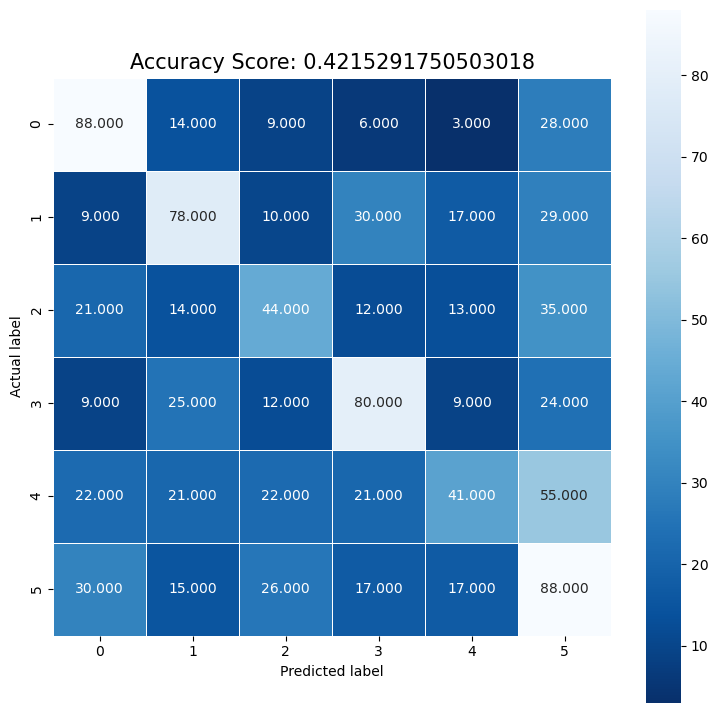

In [6]:
cm = skmetrics.confusion_matrix(y_test, predictions_test)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_test)
plt.title(all_sample_title, size = 15)